Plot mesh convergence for Taylor Green Vortes study

In [3]:
import scipy.stats as stat
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# folder = 'PISO'
folder = 'RotCorr'

# solver= 'PISO'
solver = 'RotVelCorr'
rootDir='/home/rroy/OpenFOAM/rroy-2.1.1/run/NASA-Project/Taylor-Green-Vortex/2D/'+folder+'/'

meshCellCount = np.array([32,64,128,256], dtype=np.int) #,512 # in one dimension
meshResolution = np.empty_like(meshCellCount, dtype=np.float)
caseDirectory = [];
for i in range(len(meshCellCount)):
    meshResolution[i] = 2*np.pi/meshCellCount[i]
    caseDirectory.append (str(meshCellCount[i])+'x'+str(meshCellCount[i]))
print(caseDirectory)
print(meshResolution)

['32x32', '64x64', '128x128', '256x256']
[ 0.19634954  0.09817477  0.04908739  0.02454369]


In [13]:
#Error Norms (L2 velocity, L2 pressure, Linf velocity, Linf pressure)
errorNorms  = np.empty((len(meshCellCount),4), dtype=np.float)

for i in range(len(meshCellCount)): #
    data = np.loadtxt(rootDir+caseDirectory[i]+'/output.dat', skiprows=1, usecols=(3,4,5,6))
    dataShape = np.shape(data)
    errorNorms[i, :] = data[dataShape[0]-1,:]; 
    
print(errorNorms)

[[  2.50345000e-02   2.91693000e-02   1.09640000e-03   1.78806000e-03]
 [  1.25245000e-02   1.44292000e-02   2.76145000e-04   4.51661000e-04]
 [  6.26384000e-03   7.19725000e-03   6.92402000e-05   1.14085000e-04]
 [  3.13233000e-03   3.59493000e-03   1.74460000e-05   2.90641000e-05]]


In [14]:
# velocity2ndErrorNorm  = errorNorms[:,0]/np.square(meshCellCount[:])
# pressure2ndErrorNorm  = errorNorms[:,1]/np.square(meshCellCount[:])
velocity2ndErrorNorm  = errorNorms[:,0]/meshCellCount[:]
pressure2ndErrorNorm  = errorNorms[:,1]/meshCellCount[:]
velocityInfErrorNorm  = errorNorms[:,2]
pressureInfErrorNorm  = errorNorms[:,3]
print(velocity2ndErrorNorm)

[  7.82328125e-04   1.95695312e-04   4.89362500e-05   1.22356641e-05]


In [7]:
# #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# from scipy.optimize import curve_fit

# def convergenceFunction(x,p1,p2):
#     return p1*np.log10(x)+p2

# popt, pcov = curve_fit(convergenceFunction, meshResolution, velocity2ndErrorNorm, p0=(2,-2))
# print(popt)
# print(pcov)

In [15]:
# logarithmic regressional fit
velocity2ndErrorFitCoeff=np.polyfit(np.log10(meshResolution),np.log10(velocity2ndErrorNorm),1) # 1 means linear fit
pressure2ndErrorFitCoeff=np.polyfit(np.log10(meshResolution),np.log10(pressure2ndErrorNorm),1)

print(velocity2ndErrorFitCoeff)
print(pressure2ndErrorFitCoeff)
print()
velocityInfErrorFitCoeff=np.polyfit(np.log10(meshResolution),np.log10(velocityInfErrorNorm),1)
pressureInfErrorFitCoeff=np.polyfit(np.log10(meshResolution),np.log10(pressureInfErrorNorm),1)

print(velocityInfErrorFitCoeff)
print(pressureInfErrorFitCoeff)

[ 1.99954623 -1.69293859]
[ 2.00647192 -1.62291063]

[ 1.99169466 -1.55180156]
[ 1.98141705 -1.34755339]


In [16]:
# create the best fit lines
velocity2ndErrorFitted = np.power(10,velocity2ndErrorFitCoeff[0]*np.log10(meshResolution) + velocity2ndErrorFitCoeff[1])
pressure2ndErrorFitted = np.power(10,pressure2ndErrorFitCoeff[0]*np.log10(meshResolution) + pressure2ndErrorFitCoeff[1])

print(velocity2ndErrorFitted)
print(pressure2ndErrorFitted)

velocityInfErrorFitted = np.power(10,velocityInfErrorFitCoeff[0]*np.log10(meshResolution) + velocityInfErrorFitCoeff[1])
pressureInfErrorFitted = np.power(10,pressureInfErrorFitCoeff[0]*np.log10(meshResolution) + pressureInfErrorFitCoeff[1])


print(velocityInfErrorFitted)
print(pressureInfErrorFitted)

[  7.82423686e-04   1.95667455e-04   4.89322519e-05   1.22369112e-05]
[  9.09020545e-04   2.26237955e-04   5.63063316e-05   1.40135769e-05]
[  1.09680608e-03   2.75784603e-04   6.93442062e-05   1.74361400e-05]
[  1.78502366e-03   4.52041190e-04   1.14475367e-04   2.89898572e-05]


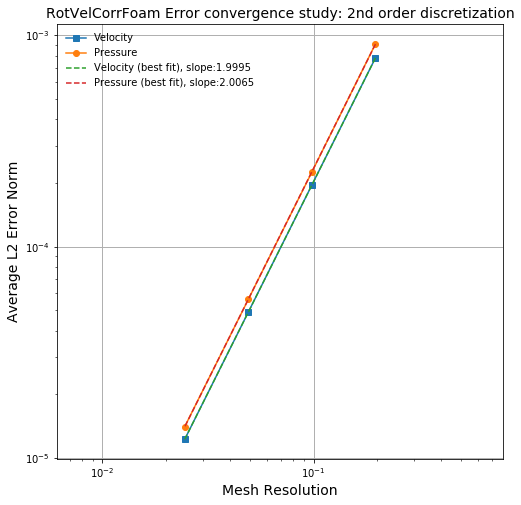

In [20]:
# Average 2nd error norm
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k') # dpi=100,
plt.loglog(meshResolution, velocity2ndErrorNorm,'s-', label='Velocity', basex=10)
plt.loglog(meshResolution, pressure2ndErrorNorm,'o-', label='Pressure', basex=10)

plt.loglog(meshResolution, velocity2ndErrorFitted, '--', label='Velocity (best fit), slope:'+str(round(velocity2ndErrorFitCoeff[0], 4)))
plt.loglog(meshResolution, pressure2ndErrorFitted, '--', label='Pressure (best fit), slope:'+str(round(pressure2ndErrorFitCoeff[0], 4)))

plt.legend(frameon=False)

plt.xlabel('Mesh Resolution', fontsize=14)
plt.ylabel('Average L2 Error Norm', fontsize=14)
plt.title(solver+'Foam Error convergence study: 2nd order discretization', fontsize=14)
plt.grid(which='major', lw=1.)
# plt.grid(which='minor', ls='--')
plt.axes().set_aspect('equal', 'datalim')
# plt.show()

plt.savefig(solver+'_Averaged2ndErrorNorm.png',dpi=200, bbox_inches=None, pad_inches=0.1,frameon=None)

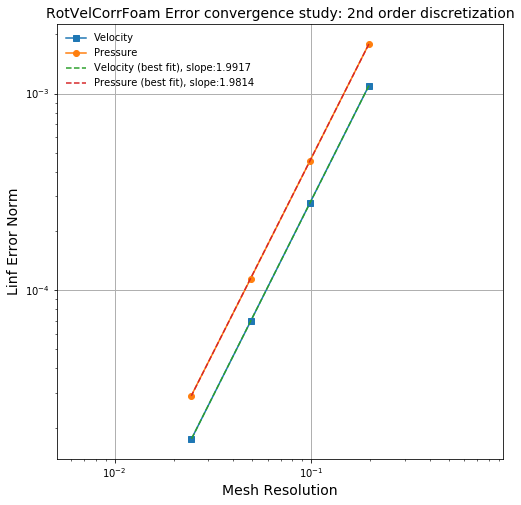

In [21]:
# Infinity error norm
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k') # dpi=100,
plt.loglog(meshResolution, velocityInfErrorNorm,'s-', label='Velocity', basex=10)
plt.loglog(meshResolution, pressureInfErrorNorm,'o-', label='Pressure', basex=10)

plt.loglog(meshResolution, velocityInfErrorFitted, '--', label='Velocity (best fit), slope:'+str(round(velocityInfErrorFitCoeff[0], 4)))
plt.loglog(meshResolution, pressureInfErrorFitted, '--', label='Pressure (best fit), slope:'+str(round(pressureInfErrorFitCoeff[0], 4)))

plt.legend(frameon=False)

plt.xlabel('Mesh Resolution', fontsize=14)
plt.ylabel('Linf Error Norm', fontsize=14)
plt.title(solver+'Foam Error convergence study: 2nd order discretization', fontsize=14)
plt.grid(which='major', lw=1.)
# plt.grid(which='minor', ls='--')
plt.axes().set_aspect('equal', 'datalim')
# plt.show()

plt.savefig(solver+'_InfinityErrorNorm.png',dpi=200, bbox_inches=None, pad_inches=0.1,frameon=None)